## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  81.277709  1583.415015  0.229267  6.118988  1.294258
1  44.931846   619.765257  0.279576  6.989068  1.245303
2  92.333342   663.388066  0.703100  8.022819  1.494184
3  52.178815  1753.115894  0.506582  9.813403  1.534865
4  88.864988   353.465311  0.991027  1.677103  1.283298


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0189709	total: 66.1ms	remaining: 1m 6s
1:	learn: 1.0091983	total: 66.6ms	remaining: 33.2s
2:	learn: 0.9996770	total: 67.1ms	remaining: 22.3s
3:	learn: 0.9905336	total: 67.7ms	remaining: 16.9s
4:	learn: 0.9805808	total: 68.3ms	remaining: 13.6s
5:	learn: 0.9708129	total: 68.8ms	remaining: 11.4s
6:	learn: 0.9614448	total: 69.2ms	remaining: 9.82s
7:	learn: 0.9495507	total: 69.7ms	remaining: 8.64s
8:	learn: 0.9384569	total: 70.1ms	remaining: 7.72s
9:	learn: 0.9265334	total: 70.6ms	remaining: 6.99s
10:	learn: 0.9172591	total: 71ms	remaining: 6.38s
11:	learn: 0.9070788	total: 71.4ms	remaining: 5.87s
12:	learn: 0.8995745	total: 71.8ms	remaining: 5.45s
13:	learn: 0.8897729	total: 72.4ms	remaining: 5.1s
14:	learn: 0.8807026	total: 73ms	remaining: 4.79s
15:	learn: 0.8723442	total: 73.4ms	remaining: 4.51s
16:	learn: 0.8607011	total: 74ms	remaining: 4.28s
17:	learn: 0.8521748	total: 74.4ms	remaining: 4.06s
18:	learn: 0.8442314	total: 74.8ms	remaining: 3.86s

92:	learn: 0.4282684	total: 107ms	remaining: 1.04s
93:	learn: 0.4250533	total: 108ms	remaining: 1.04s
94:	learn: 0.4215355	total: 108ms	remaining: 1.03s
95:	learn: 0.4171764	total: 109ms	remaining: 1.02s
96:	learn: 0.4136469	total: 109ms	remaining: 1.01s
97:	learn: 0.4104982	total: 109ms	remaining: 1s
98:	learn: 0.4076309	total: 110ms	remaining: 997ms
99:	learn: 0.4038806	total: 110ms	remaining: 989ms
100:	learn: 0.4006809	total: 110ms	remaining: 983ms
101:	learn: 0.3971024	total: 111ms	remaining: 976ms
102:	learn: 0.3945060	total: 111ms	remaining: 970ms
103:	learn: 0.3909604	total: 112ms	remaining: 964ms
104:	learn: 0.3892481	total: 112ms	remaining: 958ms
105:	learn: 0.3860882	total: 113ms	remaining: 950ms
106:	learn: 0.3827176	total: 113ms	remaining: 943ms
107:	learn: 0.3798257	total: 113ms	remaining: 936ms
108:	learn: 0.3765897	total: 114ms	remaining: 930ms
109:	learn: 0.3733128	total: 114ms	remaining: 924ms
110:	learn: 0.3707998	total: 114ms	remaining: 917ms
111:	learn: 0.3685894	t

277:	learn: 0.1461484	total: 187ms	remaining: 485ms
278:	learn: 0.1455307	total: 187ms	remaining: 484ms
279:	learn: 0.1449335	total: 188ms	remaining: 483ms
280:	learn: 0.1442093	total: 188ms	remaining: 482ms
281:	learn: 0.1434715	total: 189ms	remaining: 481ms
282:	learn: 0.1427891	total: 189ms	remaining: 480ms
283:	learn: 0.1420940	total: 190ms	remaining: 479ms
284:	learn: 0.1415238	total: 190ms	remaining: 477ms
285:	learn: 0.1408417	total: 191ms	remaining: 476ms
286:	learn: 0.1402551	total: 191ms	remaining: 475ms
287:	learn: 0.1396063	total: 192ms	remaining: 474ms
288:	learn: 0.1390736	total: 192ms	remaining: 473ms
289:	learn: 0.1384214	total: 193ms	remaining: 471ms
290:	learn: 0.1377751	total: 193ms	remaining: 470ms
291:	learn: 0.1370511	total: 194ms	remaining: 469ms
292:	learn: 0.1364528	total: 194ms	remaining: 468ms
293:	learn: 0.1359662	total: 194ms	remaining: 467ms
294:	learn: 0.1353899	total: 195ms	remaining: 466ms
295:	learn: 0.1347705	total: 195ms	remaining: 465ms
296:	learn: 

513:	learn: 0.0667020	total: 289ms	remaining: 274ms
514:	learn: 0.0664420	total: 290ms	remaining: 273ms
515:	learn: 0.0663942	total: 290ms	remaining: 272ms
516:	learn: 0.0661511	total: 291ms	remaining: 272ms
517:	learn: 0.0660464	total: 291ms	remaining: 271ms
518:	learn: 0.0659432	total: 292ms	remaining: 271ms
519:	learn: 0.0658926	total: 292ms	remaining: 270ms
520:	learn: 0.0656539	total: 293ms	remaining: 269ms
521:	learn: 0.0655517	total: 293ms	remaining: 268ms
522:	learn: 0.0654510	total: 294ms	remaining: 268ms
523:	learn: 0.0652160	total: 294ms	remaining: 267ms
524:	learn: 0.0651163	total: 295ms	remaining: 266ms
525:	learn: 0.0650178	total: 295ms	remaining: 266ms
526:	learn: 0.0649728	total: 295ms	remaining: 265ms
527:	learn: 0.0648756	total: 296ms	remaining: 264ms
528:	learn: 0.0646446	total: 296ms	remaining: 264ms
529:	learn: 0.0644083	total: 297ms	remaining: 263ms
530:	learn: 0.0642462	total: 297ms	remaining: 262ms
531:	learn: 0.0640427	total: 297ms	remaining: 262ms
532:	learn: 

698:	learn: 0.0455129	total: 369ms	remaining: 159ms
699:	learn: 0.0454943	total: 370ms	remaining: 158ms
700:	learn: 0.0452779	total: 370ms	remaining: 158ms
701:	learn: 0.0452586	total: 370ms	remaining: 157ms
702:	learn: 0.0450588	total: 371ms	remaining: 157ms
703:	learn: 0.0449931	total: 371ms	remaining: 156ms
704:	learn: 0.0449661	total: 372ms	remaining: 156ms
705:	learn: 0.0448602	total: 372ms	remaining: 155ms
706:	learn: 0.0448336	total: 373ms	remaining: 154ms
707:	learn: 0.0448158	total: 373ms	remaining: 154ms
708:	learn: 0.0447119	total: 373ms	remaining: 153ms
709:	learn: 0.0445051	total: 374ms	remaining: 153ms
710:	learn: 0.0444788	total: 374ms	remaining: 152ms
711:	learn: 0.0442885	total: 375ms	remaining: 152ms
712:	learn: 0.0441625	total: 376ms	remaining: 151ms
713:	learn: 0.0441365	total: 376ms	remaining: 151ms
714:	learn: 0.0440263	total: 377ms	remaining: 150ms
715:	learn: 0.0440092	total: 377ms	remaining: 150ms
716:	learn: 0.0439923	total: 377ms	remaining: 149ms
717:	learn: 

928:	learn: 0.0272931	total: 471ms	remaining: 36ms
929:	learn: 0.0272293	total: 472ms	remaining: 35.5ms
930:	learn: 0.0271766	total: 472ms	remaining: 35ms
931:	learn: 0.0270500	total: 473ms	remaining: 34.5ms
932:	learn: 0.0269162	total: 473ms	remaining: 34ms
933:	learn: 0.0269060	total: 474ms	remaining: 33.5ms
934:	learn: 0.0268960	total: 474ms	remaining: 32.9ms
935:	learn: 0.0268856	total: 474ms	remaining: 32.4ms
936:	learn: 0.0268297	total: 475ms	remaining: 31.9ms
937:	learn: 0.0268199	total: 475ms	remaining: 31.4ms
938:	learn: 0.0268097	total: 476ms	remaining: 30.9ms
939:	learn: 0.0267281	total: 476ms	remaining: 30.4ms
940:	learn: 0.0267185	total: 476ms	remaining: 29.9ms
941:	learn: 0.0266570	total: 477ms	remaining: 29.4ms
942:	learn: 0.0266471	total: 477ms	remaining: 28.8ms
943:	learn: 0.0265967	total: 478ms	remaining: 28.3ms
944:	learn: 0.0265799	total: 478ms	remaining: 27.8ms
945:	learn: 0.0265292	total: 479ms	remaining: 27.3ms
946:	learn: 0.0264095	total: 479ms	remaining: 26.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

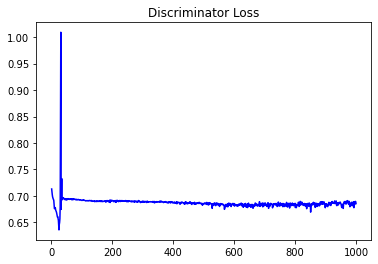

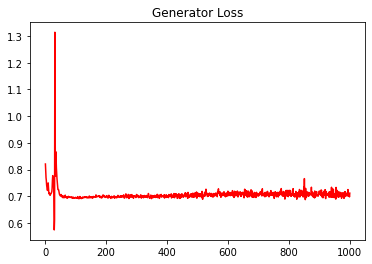

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.32424265301669586


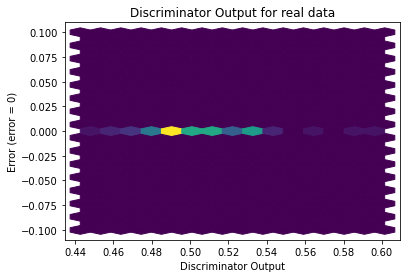

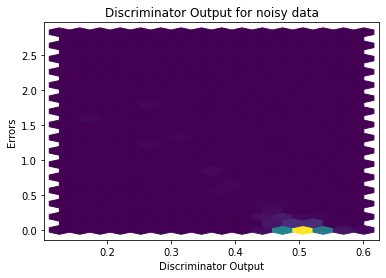

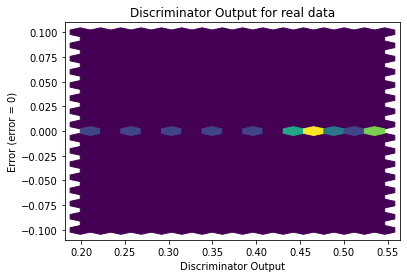

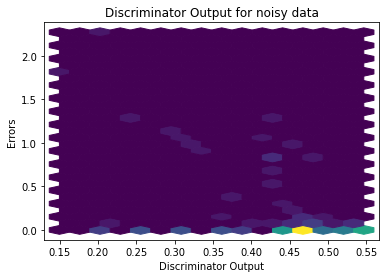

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


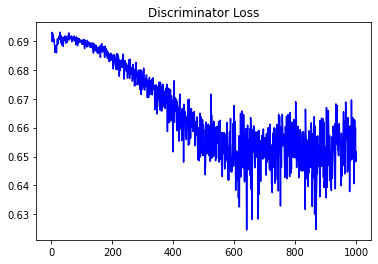

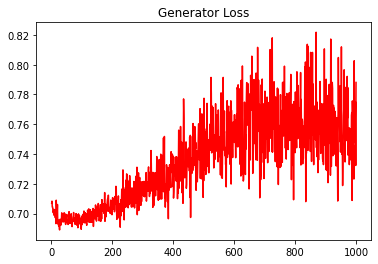

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34412960227900685


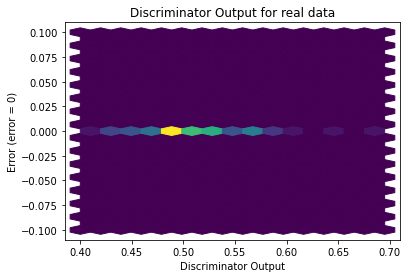

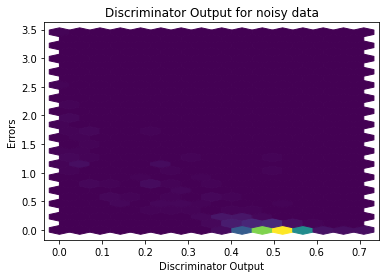

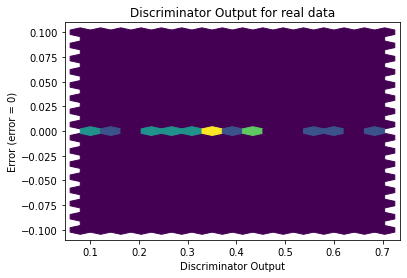

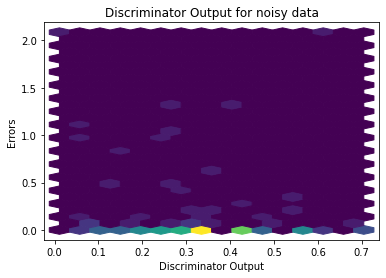

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3698]], requires_grad=True)
